In [7]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os

from keras.layers import Dropout

import tensorflow as tf
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet, MobileNetV2 
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam

In [8]:
# re-size all the images to this

IMAGE_SIZE = [224, 224]


train_path = 'datasets/Train'
valid_path = 'datasets/Test'

# add preprocessing layer to the front of VGG
#vgg = MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

MobileNetV2 = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


# don't train existing weights
for layer in MobileNetV2.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('datasets/Train/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
x= Dropout(0.5)(x)

# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=MobileNetV2.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

Found 1057 images belonging to 4 classes.
Found 49 images belonging to 4 classes.
Epoch 1/5
106/106 [==============================] - 92s 865ms/step - loss: 3.0830 - accuracy: 0.6887 - val_loss: 4.7413 - val_accuracy: 0.7347
Epoch 2/5
106/106 [==============================] - 114s 1s/step - loss: 1.5684 - accuracy: 0.8392 - val_loss: 3.9199 - val_accuracy: 0.7755
Epoch 3/5
106/106 [==============================] - 114s 1s/step - loss: 1.0198 - accuracy: 0.8912 - val_loss: 0.9897 - val_accuracy: 0.8367
Epoch 4/5
106/106 [==============================] - 108s 1s/step - loss: 0.7966 - accuracy: 0.9196 - val_loss: 3.1598 - val_accuracy: 0.7959
Epoch 5/5
106/106 [==============================] - 111s 1s/step - loss: 0.8096 - accuracy: 0.9338 - val_loss: 2.0999 - val_accuracy: 0.7755


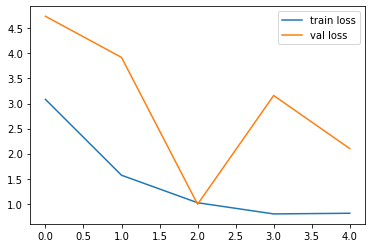

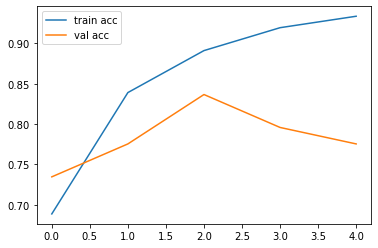

In [9]:
# Decide cost and optimization method 
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


# Use  Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale = 1./255)

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')

# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()


# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
